In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from rdkit import Chem
sns.set_theme(style='ticks', palette='bright', font='sans-serif', font_scale=1.2)

In [2]:
#load all relevant datasets
MSA_Smiles_P = pd.read_csv("MSA_short_raw_reformated.csv")
polyinfo_Smiles_P = pd.read_csv("polyinfo_converted.csv")
dataset1_Smiles_P = pd.read_csv('dataset1_imputed_all.csv')
dataset1X_descriptors = pd.read_csv('dataset1X_descriptors.csv')
dataset1X_descriptors = dataset1X_descriptors.drop(dataset1X_descriptors.columns[0], axis=1)
dataset1X_fingerprints = pd.read_csv('dataset1X_fingerprints.csv')
dataset1X_fingerprints = dataset1X_fingerprints.drop(dataset1X_fingerprints.columns[0], axis=1)
dataset2X_descriptors = pd.read_csv('dataset2X_descriptors.csv')
dataset2X_descriptors = dataset2X_descriptors.drop(dataset2X_descriptors.columns[0], axis=1)
dataset2X_fingerprints = pd.read_csv('dataset2X_fingerprints.csv')
dataset2X_fingerprints = dataset2X_fingerprints.drop(dataset2X_fingerprints.columns[0], axis=1)
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

In [3]:
dataset1_Smiles_P['Smiles'].value_counts()

*C*                                                                         60
*CC(*)C                                                                     32
*CCOC(=O)c1ccc(C(=O)O*)cc1                                                  31
*CC(*)c1ccccc1                                                              17
*C(C)=C(*)[Si](C)(C)C                                                       16
                                                                            ..
*C1C(*)C2CC1C1CC([Si](C)(C)C)C21                                             1
*/C(=C(\*)c1ccc([Si](C)(C)CCCCCCCC)cc1)c1ccc(CCCC)cc1                        1
*Oc1c(C)cc(C2CCC(C(C)(C)c3cc(C)c(OC(=O)c4ccc(C(*)=O)cc4)c(C)c3)CC2C)cc1C     1
*CC(*)OC(=O)C1CCCCC1                                                         1
*c1ccc(Oc2ccc(S(=O)(=O)c3ccc(Oc4ccc(C5(*)OC(=O)c6ccccc65)cc4)cc3)cc2)cc1     1
Name: Smiles, Length: 353, dtype: int64

In [135]:
dataset1_Smiles_P

,Unnamed: 0,index,Name,PID,Smiles,Details,Condition,Reference,Year,He,...,log10_O2_Bayesian,log10_N2_Bayesian,log10_CO2_Bayesian,log10_CH4_Bayesian,log10_He_Etree,log10_H2_Etree,log10_O2_Etree,log10_N2_Etree,log10_CO2_Etree,log10_CH4_Etree
0,0,0,polyethene,P010001,*C*,Dynamic method,"25 [C] ,","Pasternak, R. A.; Schimscheimer, J. F.; Heller...",1970,NaN,...,0.531479,-0.075721,1.110590,0.012254,1.201301,1.238196,0.531479,-0.075721,1.110590,-0.103039
1,1,1,polyethene,P010001,*C*,Dynamic method,"25 [C] ,","Pasternak, R. A.; Schimscheimer, J. F.; Heller...",1970,NaN,...,0.429002,-0.191294,1.037426,-0.101212,0.512792,0.845879,0.372675,-0.111720,1.037426,0.361122
2,2,2,polyethene,P010001,*C*,"Mocon Oxtran 100 equipment; P.S. Holden, G. A....","30 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,NaN,...,-0.665546,-1.367414,-0.066764,-1.348410,0.803205,0.693273,-0.665546,-1.412270,-0.130830,-1.517954
3,3,3,polyethene,P010001,*C*,"Mocon Oxtran 100 equipment; P.S. Holden, G. A....","30 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,NaN,...,-0.327902,-1.004516,0.274628,-0.963282,0.696047,0.613919,-0.327902,-1.146430,0.327439,-1.337536
4,4,4,polyethene,P010001,*C*,NaN,"25 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,1.77,...,-0.013228,-0.490133,0.826281,-0.003425,0.247973,0.794222,-0.013228,-0.606161,0.774200,-0.306994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,773,313,Poly(2-adamanthyl vinyl ether),NaN,*CC(*)OC1C2CC3CC(C2)CC1C3,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,...,0.778874,0.227887,1.401401,0.360861,1.035338,1.350877,0.778874,0.227887,1.401401,0.498163
774,774,314,Poly(benzyl vinyl ether),NaN,*CC(*)OCc1ccccc1,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,...,0.367356,-0.102373,1.045323,0.067094,0.506273,0.849116,0.367356,-0.102373,1.045323,0.359446
775,775,315,Poly(cyclohexylmethyl vinyl ether),NaN,*CC(*)OCC1CCCCC1,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,...,0.190332,-0.397940,0.770115,-0.314109,0.966260,0.943327,0.190332,-0.397940,0.770115,-0.114003
776,776,316,Poly(8-tricyclo[5.2.1.0]decylmethyl vinyl ether),NaN,*CC(*)OCC1CC2CC1C1CCCC21,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,...,-0.091515,-0.886057,0.454845,-0.901289,0.922455,1.046136,-0.091515,-0.886057,0.454845,-1.037802


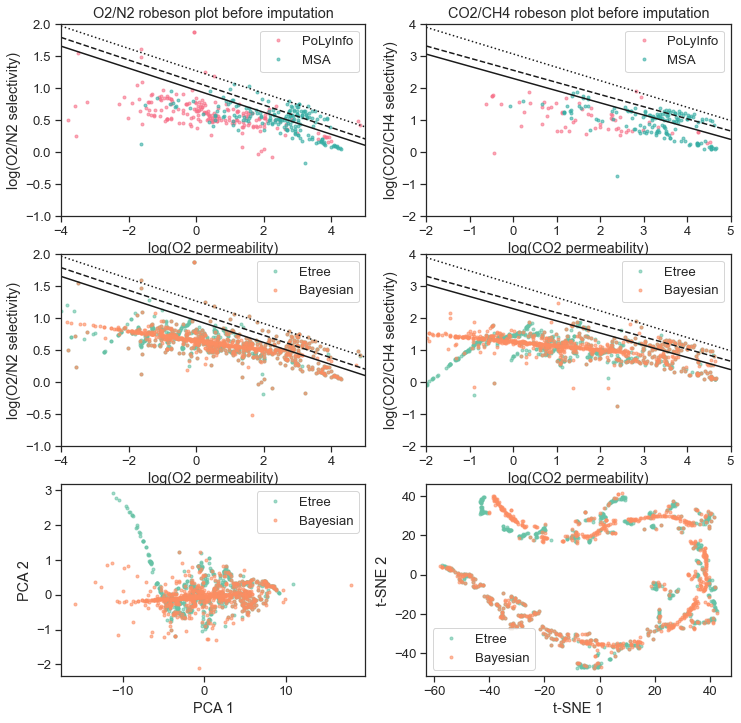

In [233]:
#visualize the permeability space
fig = plt.figure(figsize=(12,12))

#O2/N2 robeson plot before imputation
sns.set_palette("husl", 2)
plt.subplot(3,2,1)
permeability = polyinfo_Smiles_P.iloc[:,-4]
selectivity = polyinfo_Smiles_P.iloc[:,-4] - polyinfo_Smiles_P.iloc[:,-3]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = MSA_Smiles_P.iloc[:,-4]
selectivity = MSA_Smiles_P.iloc[:,-4] - MSA_Smiles_P.iloc[:,-3]
plt.plot(permeability, selectivity, '.', alpha=0.6)
xmin = -4
xmax = 5
plt.xlim([xmin, xmax])
plt.ylim([-1, 2])
plt.plot([xmin, xmax], [np.log10(9.2008)-0.1724*xmin, np.log10(9.2008)-0.1724*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(12.148)-0.1765*xmin, np.log10(12.148)-0.1765*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(18.50)-0.1754*xmin, np.log10(18.50)-0.1754*xmax], ':k') #2015 upper bound
plt.title('O2/N2 robeson plot before imputation')
plt.xlabel('log(O2 permeability)')
plt.ylabel('log(O2/N2 selectivity)')
plt.legend(['PoLyInfo', 'MSA'])

#CO2/CH4 robeson plot before imputation
plt.subplot(3,2,2)
permeability = polyinfo_Smiles_P.iloc[:,-2]
selectivity = polyinfo_Smiles_P.iloc[:,-2] - polyinfo_Smiles_P.iloc[:,-1]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = MSA_Smiles_P.iloc[:,-2]
selectivity = MSA_Smiles_P.iloc[:,-2] - MSA_Smiles_P.iloc[:,-1]
plt.plot(permeability, selectivity, '.', alpha=0.6)
xmin = -2
xmax =5
plt.xlim([xmin, xmax])
plt.ylim([-2, 4])
plt.plot([xmin, xmax], [np.log10(197.81)-0.3807*xmin, np.log10(197.81)-0.3807*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(357.33)-0.3794*xmin, np.log10(357.33)-0.3794*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(1155.60)-0.4165*xmin, np.log10(1155.60)-0.4165*xmax], ':k') #2019 upper bound
plt.legend(['PoLyInfo', 'MSA'])
plt.title('CO2/CH4 robeson plot before imputation')
plt.xlabel('log(CO2 permeability)')
plt.ylabel('log(CO2/CH4 selectivity)')

sns.set_palette("Set2")
#O2/N2 robeson plot after imputation
plt.subplot(3,2,3)
permeability = dataset1_Smiles_P.iloc[:,-4]
selectivity = dataset1_Smiles_P.iloc[:,-4] - dataset1_Smiles_P.iloc[:,-3]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = dataset1_Smiles_P.iloc[:,-10]
selectivity = dataset1_Smiles_P.iloc[:,-10] - dataset1_Smiles_P.iloc[:,-9]
plt.plot(permeability, selectivity, '.', alpha=0.6)
xmin = -4
xmax = 5
plt.xlim([xmin, xmax])
plt.ylim([-1, 2])
#plt.title("O2/N2 robeson plot after imputation")
plt.xlabel('log(O2 permeability)')
plt.ylabel('log(O2/N2 selectivity)')
plt.legend(['Etree', 'Bayesian'])
plt.plot([xmin, xmax], [np.log10(9.2008)-0.1724*xmin, np.log10(9.2008)-0.1724*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(12.148)-0.1765*xmin, np.log10(12.148)-0.1765*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(18.50)-0.1754*xmin, np.log10(18.50)-0.1754*xmax], ':k') #2015 upper bound

#CO2/CH4 robeson plot after imputation
plt.subplot(3,2,4)
permeability = dataset1_Smiles_P.iloc[:,-2]
selectivity = dataset1_Smiles_P.iloc[:,-2] - dataset1_Smiles_P.iloc[:,-1]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = dataset1_Smiles_P.iloc[:,-8]
selectivity = dataset1_Smiles_P.iloc[:,-8] - dataset1_Smiles_P.iloc[:,-7]
plt.plot(permeability, selectivity, '.', alpha=0.6)
xmin = -2
xmax =5
plt.xlim([xmin, xmax])
plt.ylim([-2, 4])
#plt.title('CO2/CH4 robeson plot after imputation')
plt.xlabel('log(CO2 permeability)')
plt.ylabel('log(CO2/CH4 selectivity)')
plt.legend(['Etree', 'Bayesian'])
plt.plot([xmin, xmax], [np.log10(197.81)-0.3807*xmin, np.log10(197.81)-0.3807*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(357.33)-0.3794*xmin, np.log10(357.33)-0.3794*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(1155.60)-0.4165*xmin, np.log10(1155.60)-0.4165*xmax], ':k') #2019 upper bound

#PCA analysis
plt.subplot(3,2,5)
pca = PCA(n_components=2)
concatenated = np.append(dataset1_Smiles_P.iloc[:,-6:], dataset1_Smiles_P.iloc[:,-12:-6], axis=0)
transformed = pca.fit_transform(concatenated)
plt.plot(transformed[:778,0], transformed[:778,1], '.', alpha=0.6)
plt.plot(transformed[778:,0], transformed[778:,1], '.', alpha=0.6)
plt.legend(['Etree', 'Bayesian'])
#plt.title('PCA Analysis after Imputation')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#tSNE analysis
plt.subplot(3,2,6)
tsne = TSNE(n_components=2)
concatenated = np.append(dataset1_Smiles_P.iloc[:,-6:], dataset1_Smiles_P.iloc[:,-12:-6], axis=0)
transformed = tsne.fit_transform(concatenated)
plt.plot(transformed[:778,0], transformed[:778,1], '.', alpha=0.6)
plt.plot(transformed[778:,0], transformed[778:,1], '.', alpha=0.6)
plt.legend(['Etree', 'Bayesian'])
#plt.title('t-SNE Analysis after Imputation')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
fig.savefig('distributions.svg', format='svg')

In [8]:
#average together permeabilities for the same polymer and plot
Dataset1_grouped = dataset1_Smiles_P.groupby('Smiles').mean().reset_index()

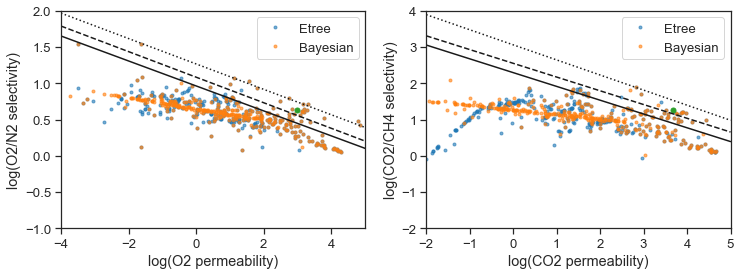

In [299]:
#visualize the grouped permeability space

fig = plt.figure(figsize=(12,4))
#O2/N2 robeson plot after imputation
plt.subplot(1,2,1)
permeability = Dataset1_grouped.iloc[:,-4]
selectivity = Dataset1_grouped.iloc[:,-4] - Dataset1_grouped.iloc[:,-3]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = Dataset1_grouped.iloc[:,-10]
selectivity = Dataset1_grouped.iloc[:,-10] - Dataset1_grouped.iloc[:,-9]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = Dataset1_grouped.iloc[index,-10]
selectivity = Dataset1_grouped.iloc[index,-10] - Dataset1_grouped.iloc[index,-9]
plt.plot(permeability, selectivity, '.', markersize=10)
xmin = -4
xmax = 5
plt.xlim([xmin, xmax])
plt.ylim([-1, 2])
#plt.title("O2/N2 robeson plot after imputation")
plt.xlabel('log(O2 permeability)')
plt.ylabel('log(O2/N2 selectivity)')
plt.legend(['Etree', 'Bayesian'])
plt.plot([xmin, xmax], [np.log10(9.2008)-0.1724*xmin, np.log10(9.2008)-0.1724*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(12.148)-0.1765*xmin, np.log10(12.148)-0.1765*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(18.50)-0.1754*xmin, np.log10(18.50)-0.1754*xmax], ':k') #2015 upper bound

#CO2/CH4 robeson plot after imputation
plt.subplot(1,2,2)
permeability = Dataset1_grouped.iloc[:,-2]
selectivity = Dataset1_grouped.iloc[:,-2] - Dataset1_grouped.iloc[:,-1]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = Dataset1_grouped.iloc[:,-8]
selectivity = Dataset1_grouped.iloc[:,-8] - Dataset1_grouped.iloc[:,-7]
plt.plot(permeability, selectivity, '.', alpha=0.6)
permeability = Dataset1_grouped.iloc[index,-8]
selectivity = Dataset1_grouped.iloc[index,-8] - Dataset1_grouped.iloc[index,-7]
plt.plot(permeability, selectivity, '.', markersize=10)
xmin = -2
xmax =5
plt.xlim([xmin, xmax])
plt.ylim([-2, 4])
#plt.title('CO2/CH4 robeson plot after imputation')
plt.xlabel('log(CO2 permeability)')
plt.ylabel('log(CO2/CH4 selectivity)')
plt.legend(['Etree', 'Bayesian'])
plt.plot([xmin, xmax], [np.log10(197.81)-0.3807*xmin, np.log10(197.81)-0.3807*xmax], '-k') #1991 upper bound
plt.plot([xmin, xmax], [np.log10(357.33)-0.3794*xmin, np.log10(357.33)-0.3794*xmax], '--k') #2008 upper bound
plt.plot([xmin, xmax], [np.log10(1155.60)-0.4165*xmin, np.log10(1155.60)-0.4165*xmax], ':k') #2019 upper bound
fig.savefig('distributions_grouped.svg', format='svg')

In [138]:
#check how many outliers there are from the ERT imputation
Dataset1_grouped.where(Dataset1_grouped['log10_CO2_Etree'] < -2).dropna('index','all')

,Smiles,Unnamed: 0,index,Year,He,H2,O2,N2,CO2,CH4,...,log10_O2_Bayesian,log10_N2_Bayesian,log10_CO2_Bayesian,log10_CH4_Bayesian,log10_He_Etree,log10_H2_Etree,log10_O2_Etree,log10_N2_Etree,log10_CO2_Etree,log10_CH4_Etree
90,*CC(*)(C)C#N,149.0,149.0,1980.00,NaN,NaN,0.000904,NaN,0.002394,NaN,...,-3.043639,-3.942298,-2.620876,-4.140387,-2.046213,-1.276946,-3.043639,-3.799094,-2.620876,-1.867697
98,*CC(*)C#N,146.5,146.5,1983.25,NaN,NaN,0.001386,0.000160,0.001199,NaN,...,-3.350067,-4.082479,-2.708681,-4.150303,-2.313480,-1.220624,-3.350067,-4.074981,-2.720143,-1.878226
150,*CC(CS(=O)(=O)CC)O*,485.0,485.0,1998.00,NaN,NaN,0.011704,NaN,NaN,NaN,...,-1.931666,-2.728231,-1.346935,-2.792587,-0.920275,-1.353750,-1.931666,-2.915480,-2.055542,-1.966155
154,*CC(CS(C)(=O)=O)O*,483.5,483.5,1998.00,NaN,NaN,0.001862,NaN,NaN,NaN,...,-2.730020,-3.586298,-2.154150,-3.703217,-1.293911,-2.096035,-2.730020,-3.200135,-2.318760,-1.896145
163,*CC(O)COc1ccc(O*)cc1,304.0,304.0,1963.00,NaN,NaN,0.003000,NaN,NaN,NaN,...,-2.522880,-3.363664,-1.944710,-3.466945,-1.241827,-1.715242,-2.522880,-3.162415,-2.138029,-1.896145
175,*CCCCCCCC(=O)N*,385.0,385.0,1993.00,0.15694,0.030590,0.017290,0.001569,0.002194,NaN,...,-1.762205,-2.804266,-2.658664,-2.748738,-0.804266,-1.514421,-1.762205,-2.804266,-2.658664,-1.966155
176,*CCCCCCCCCCCC(=O)N*,386.0,386.0,1993.00,0.30590,0.053998,0.025270,0.002035,0.004057,NaN,...,-1.597395,-2.691457,-2.391849,-2.714459,-0.514421,-1.267622,-1.597395,-2.691457,-2.391849,-2.007717
188,*CCOC(=O)c1ccc(O*)cc1,288.0,288.0,1974.00,NaN,NaN,0.000318,0.000009,0.000677,NaN,...,-3.497750,-5.040458,-3.169431,-5.529981,-3.029015,-1.146366,-3.497750,-5.040458,-3.169431,-1.867697
191,*CCOCCOC(=O)c1ccc(-c2ccc(C(=O)O*)cc2)cc1,330.0,330.0,2004.00,NaN,NaN,0.004843,NaN,NaN,NaN,...,-2.314900,-3.140129,-1.734423,-3.229717,-1.102081,-1.419452,-2.314900,-3.049243,-2.005701,-1.909814
219,*NC(CCC(=O)O)C(*)=O,389.0,389.0,1984.00,NaN,0.120000,0.000600,0.000100,0.006000,NaN,...,-3.221849,-4.000000,-2.221849,-4.442742,-2.045409,-0.920819,-3.221849,-4.000000,-2.221849,-1.867697


In [199]:
#identify the existing high performance polymers
highperf_ON_indices = Dataset1_grouped.where(Dataset1_grouped['log10_O2_Bayesian'] - Dataset1_grouped['log10_N2_Bayesian'] > np.log10(12.148) - 0.1765*Dataset1_grouped['log10_O2_Bayesian']).dropna('index','all').index
highperf_CC_indices = Dataset1_grouped.where(Dataset1_grouped['log10_CO2_Bayesian'] - Dataset1_grouped['log10_CH4_Bayesian'] > np.log10(357.33)-0.3794*Dataset1_grouped['log10_CO2_Bayesian']).dropna('index','all').index

Dataset1_top_ON = Dataset1_grouped.where(Dataset1_grouped['log10_O2_Bayesian'] - Dataset1_grouped['log10_N2_Bayesian'] > np.log10(12.148) - 0.1765*Dataset1_grouped['log10_O2_Bayesian']).dropna('index','all')
Dataset1_top_CC = Dataset1_grouped.where(Dataset1_grouped['log10_CO2_Bayesian'] - Dataset1_grouped['log10_CH4_Bayesian'] > np.log10(357.33)-0.3794*Dataset1_grouped['log10_CO2_Bayesian']).dropna('index','all')
Dataset1_top = pd.merge(Dataset1_top_ON, Dataset1_top_CC, on='Smiles', how='inner')
Dataset1_top

,Smiles,Unnamed: 0_x,index_x,Year_x,He_x,H2_x,O2_x,N2_x,CO2_x,CH4_x,...,log10_O2_Bayesian_y,log10_N2_Bayesian_y,log10_CO2_Bayesian_y,log10_CH4_Bayesian_y,log10_He_Etree_y,log10_H2_Etree_y,log10_O2_Etree_y,log10_N2_Etree_y,log10_CO2_Etree_y,log10_CH4_Etree_y
0,*C1CCCCC1*,460.000000,460.000000,1984.000000,NaN,NaN,61000.000000,20000.000000,NaN,NaN,...,4.785330,4.301030,5.407568,4.594136,4.250420,4.565848,4.785330,4.301030,4.645422,4.544068
1,*CC(*)CCCC,92.000000,92.000000,1984.000000,NaN,NaN,72000.000000,27000.000000,NaN,NaN,...,4.857332,4.431364,5.490683,4.752817,4.250420,4.565848,4.857332,4.431364,4.645422,4.544068
2,*CN1CN(*)Cc2cc3c(cc21)C1c2ccccc2C3c2cc(*)c(*)cc21,644.333333,131.333333,2014.333333,2042.500000,5839.666667,1621.333333,335.416667,6830.000000,446.150000,...,3.165150,2.449949,3.735275,2.542817,3.266202,3.752253,3.165150,2.449949,3.727858,2.542817
3,*Oc1c(C#N)c2c(c(C#N)c1O*)Oc1cc3c(cc1O2)-c1cc(C...,689.500000,180.500000,2018.000000,2405.000000,6700.000000,2365.000000,658.000000,13085.000000,1102.000000,...,3.270552,2.640403,3.968008,2.785085,3.361605,3.794631,3.270552,2.640403,3.968008,2.785085
4,*Oc1c(C#N)c2c(c(C#N)c1O*)Oc1cc3c(cc1O2)-c1ccc(...,693.500000,184.500000,2018.000000,1700.000000,4430.000000,1510.000000,380.000000,8505.000000,582.500000,...,3.172942,2.566072,3.916082,2.720497,3.226437,3.643946,3.172942,2.566072,3.916082,2.720497
5,*Oc1c(C#N)c2c(c(C#N)c1O*)Oc1cc3c(cc1O2)-c1cccc...,691.500000,182.500000,2018.000000,1620.500000,4415.000000,1392.500000,341.000000,7875.000000,563.000000,...,3.122299,2.503013,3.861584,2.668973,3.199245,3.632411,3.122299,2.503013,3.861584,2.668973
6,*Oc1c(C#N)c2c(c(C#N)c1O*)Oc1cc3c(cc1O2)-c1cccc...,651.000000,139.000000,2015.000000,1628.500000,4520.000000,1624.000000,441.875000,8890.000000,622.000000,...,3.137641,2.528105,3.872252,2.663319,3.190328,3.624245,3.137641,2.528105,3.872252,2.663319
7,*Oc1cc2c(cc1O*)C(=O)N(c1c(C)c(C)c(-n3c(=O)c4cc...,655.000000,146.000000,2015.000000,NaN,3431.000000,542.000000,87.420000,NaN,83.680000,...,2.733999,1.941611,3.328563,1.922622,3.035888,3.535421,2.733999,1.941611,3.395819,1.922622
8,*Oc1cc2c(cc1O*)C1(C)c3cc4c(cc3C2(C)c2cc3cc5c(c...,666.500000,157.500000,2017.000000,5046.666667,13638.333333,6246.666667,1987.833333,29333.333333,3287.166667,...,3.771666,3.248847,4.441523,3.454011,3.693453,4.123442,3.771666,3.248847,4.441523,3.454011
9,*Oc1cc2c(cc1O*)C1(CC2(C)C)CC(C)(C)c2cc3c(cc21)...,622.200000,107.600000,2012.200000,1448.000000,3356.800000,1232.800000,337.800000,6540.400000,468.800000,...,3.062485,2.498809,3.777663,2.632203,3.151327,3.511354,3.062485,2.498809,3.777663,2.632203


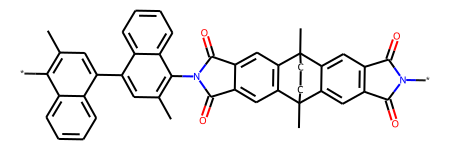

In [297]:
mols = Dataset1_top['Smiles'].apply(Chem.MolFromSmiles)
mols.to_numpy()[10]

In [298]:
Dataset1_top['Smiles'][10]

'*c1c(C)cc(-c2cc(C)c(N3C(=O)c4cc5c(cc4C3=O)C3(C)CCC5(C)c4cc5c(cc43)C(=O)N(*)C5=O)c3ccccc23)c2ccccc12'

<AxesSubplot:xlabel='SMILES', ylabel='Density'>

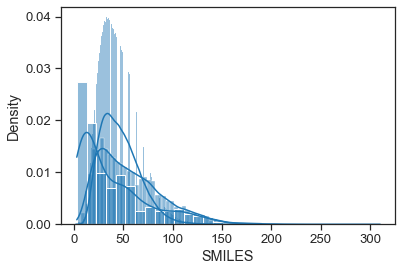

In [223]:
#plot the distribution of SMILEs string lengths for the datasets
sns.set_palette('tab10')
sns.histplot(dataset3['SMILES'].apply(len), stat='density')
sns.histplot(dataset2['Smiles'].apply(len), stat='density')
sns.histplot(dataset1_Smiles_P['Smiles'].apply(len), stat='density')

### Visualize the Descriptor Space

In [3]:
dataset2X_descriptors = dataset2X_descriptors[dataset1X_descriptors.columns]
dataset2X_descriptors

,0,1,2,3,4,5,6,7,8,14,...,178,180,187,188,189,196,198,200,205,206
0,2.395833,0.750000,2.395833,0.750000,0.414720,42.081,36.033,42.046950,18.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.332824,0.743056,2.332824,0.743056,0.451401,56.108,48.044,56.062600,24.0,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.310000,0.734306,2.310000,0.734306,0.476641,70.135,60.055,70.078250,30.0,2.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.374491,0.699074,2.374491,0.699074,0.465496,70.135,60.055,70.078250,30.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.300547,0.726528,2.300547,0.726528,0.490565,84.162,72.066,84.093900,36.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12590,2.314907,0.288944,2.314907,0.288944,0.461105,176.218,168.154,176.062600,64.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12591,5.737019,0.130787,5.737019,0.130787,0.318071,224.262,216.198,224.062600,80.0,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12592,3.721720,0.120795,3.721720,0.120795,0.330978,250.300,240.220,250.078250,90.0,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12593,3.381304,-1.363269,3.381304,0.092176,0.259140,320.467,304.339,320.102127,112.0,0.791667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


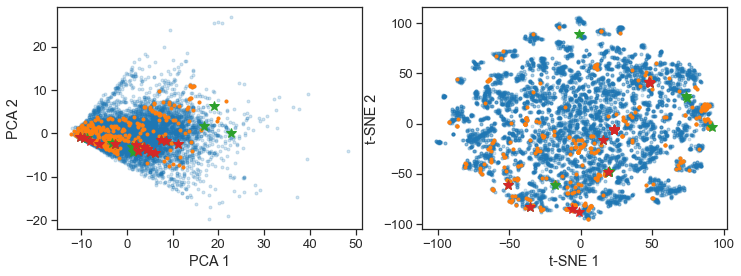

In [11]:
#Visualize the descriptor space
fig = plt.figure(figsize=(12,9))
X = np.append(dataset1X_descriptors, dataset2X_descriptors, axis=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

sns.set_palette('tab10')
plt.subplot(2,2,1)
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)
plt.plot(transformed[:,0], transformed[:,1], '.',alpha=0.2)
plt.plot(transformed[:353,0], transformed[:353,1], '.')
plt.plot(transformed[highperf_ON_indices,0], transformed[highperf_ON_indices,1], '*', markersize=10)
plt.plot(transformed[highperf_CC_indices,0], transformed[highperf_CC_indices,1], '*', markersize=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(2,2,2)
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X)
plt.plot(transformed[:,0], transformed[:,1], '.', alpha=0.2)
plt.plot(transformed[:353,0], transformed[:353,1], '.')
plt.plot(transformed[highperf_ON_indices,0], transformed[highperf_ON_indices,1], '*', markersize=10)
plt.plot(transformed[highperf_CC_indices,0], transformed[highperf_CC_indices,1], '*', markersize=10)
#plt.legend(['Dataset2','Dataset1','high performance O2/N2', 'high performance CO2/CH4'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
fig.savefig('descriptor_space.eps', format='eps')

### Visualize the Fingerprint Space

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


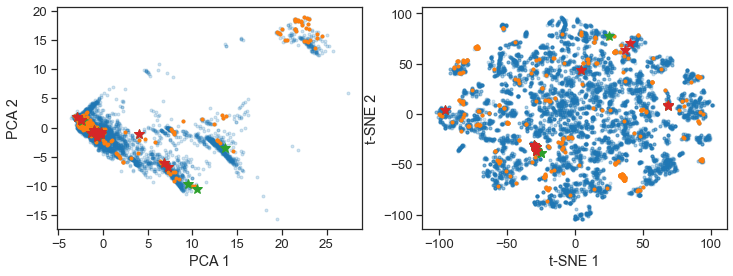

In [12]:
#Visualize the fingerprint space
fig = plt.figure(figsize=(12,9))
X = np.append(dataset1X_fingerprints, dataset2X_fingerprints, axis=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

sns.set_palette('tab10')
plt.subplot(2,2,1)
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)
plt.plot(transformed[:,0], transformed[:,1], '.', alpha=0.2)
plt.plot(transformed[:353,0], transformed[:353,1], '.')
plt.plot(transformed[highperf_ON_indices,0], transformed[highperf_ON_indices,1], '*', markersize=10)
plt.plot(transformed[highperf_CC_indices,0], transformed[highperf_CC_indices,1], '*', markersize=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(2,2,2)
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X)
plt.plot(transformed[:,0], transformed[:,1], '.', alpha=0.2)
plt.plot(transformed[:353,0], transformed[:353,1], '.')
plt.plot(transformed[highperf_ON_indices,0], transformed[highperf_ON_indices,1], '*', markersize=10)
plt.plot(transformed[highperf_CC_indices,0], transformed[highperf_CC_indices,1], '*', markersize=10)
#plt.legend(['Dataset2','Dataset1','high performance O2/N2', 'high performance CO2/CH4'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
fig.savefig('fingerprint_space.eps', format='eps')